# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading all 4 Datasets

In [ ]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

### Q2. Shape of Movie File

In [ ]:
movie_shape = movies.shape
movie_shape

(9742, 3)

### Q3. Shape of Ratings File

In [ ]:
ratings_shape = ratings.shape
ratings_shape

(100836, 4)

### Q4. Unique User ID available in ratings.csv

In [ ]:
unique_users = ratings['userId'].nunique()
unique_users

610

### Q5. Movie which received maximum number of user ratings

In [ ]:
# Grouping ratings of movies using Movie_Id
movie_ratings_counts = ratings.groupby('movieId').size()

# Finding the movie with the Max. No. of Ratings
max_rated_movie_id = movie_ratings_counts.idxmax()

# Now find title of the movie which has max. ratings
max_rated_movie_title = movies[movies['movieId'] == max_rated_movie_id]['title'].iloc[0]

print("Movie Name and its ID which has the maximum number of ratings: \n", max_rated_movie_id, "\n", max_rated_movie_title)

Movie Name and its ID which has the maximum number of ratings: 
 356 
 Forrest Gump (1994)


### Q6. List of correct tags submitted by users to "Matrix, The (1999)" movie

In [ ]:
# Spot the movieId for "Matrix, The (1999)"
matrix = movies[movies['title'] == 'Matrix, The (1999)']
matrix_id = matrix['movieId'].values[0]

# Filter tags for the movie with its movieId
matrix_tags = tags[tags['movieId'] == matrix_id]

# Displaying unique tags for the movie
unique_tags = matrix_tags['tag'].unique()
print("Tags for 'Matrix, The (1999)':")
print(unique_tags)

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### Q7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [ ]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']

if not terminator2_movie.empty:
    terminator2_movie_id = terminator2_movie.iloc[0]['movieId']

    # Calculating the Avg. user rating for the Terminator 2 movie using mean.
    average_rating = ratings[ratings['movieId'] == terminator2_movie_id]['rating'].mean()

    print(f"Average user rating for Movie is': {average_rating:.2f}")
else:
    print("Movie not found")


Average user rating for Movie is': 3.97


### Q8. How is data distribution of user ratings for "Fight Club (1999)" movie looks like ?

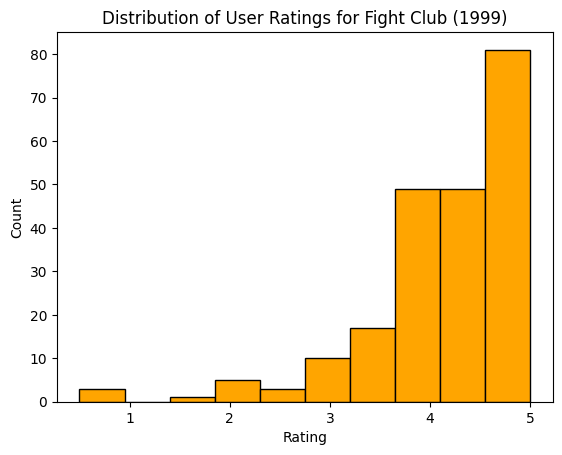

In [ ]:
# Retrieve the movieId for "Fight Club (1999)"
fight_club_entry = movies[movies['title'] == 'Fight Club (1999)']

if not fight_club_entry.empty:
    fight_club_id = fight_club_entry.iloc[0]['movieId']

    # Extract ratings for the specified movie
    ratings_fight_club = ratings[ratings['movieId'] == fight_club_id]['rating']

    # Creating a histogram to visualize the distribution of ratings for "Fight Club (1999)"
    plt.hist(ratings_fight_club, bins=10, edgecolor='black',  color='orange')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Distribution of User Ratings for Fight Club (1999)')
    plt.show()
else:
    print("Movie not found")


> *The distribution above is left-skewed, which means most of the data points are on the right, and there's a longer tail on the left*



Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [ ]:
# Aggregate user ratings by movieId, calculating count and average
rating_summary = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Rename columns
rating_summary.columns = ['movieId', 'num_ratings', 'avg_rating']

# Combine movie details with the summary statistics using an inner join
combined_data = pd.merge(movies, rating_summary, on='movieId', how='inner')

# Select movies with more than 50 ratings
popular_movies = combined_data[combined_data['num_ratings'] > 50]

# Show the top rows of the popular movies dataset
popular_movies.head(10)


,movieId,title,genres,num_ratings,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
9,10,GoldenEye (1995),Action|Adventure|Thriller,132,3.496212
10,11,"American President, The (1995)",Comedy|Drama|Romance,70,3.671429
15,16,Casino (1995),Crime|Drama,82,3.926829
16,17,Sense and Sensibility (1995),Drama|Romance,67,3.776119
18,19,Ace Ventura: When Nature Calls (1995),Comedy,88,2.727273


### Q9. Which Movie is the most popular based on  average user ratings?

In [ ]:
# Sorting popular movies by 'rating_mean' in descending order
sorted_data = popular_movies.sort_values(by='avg_rating', ascending=False)

# Getting the most popular movie (highest average rating)
most_popular_movie = sorted_data.iloc[0]

print("Most popular movie based on average user ratings:", most_popular_movie['title'])
print("Average Rating:", round(most_popular_movie['avg_rating'], 2))

Most popular movie based on average user ratings: Shawshank Redemption, The (1994)
Average Rating: 4.43


### Q10. Top 5 popular movies based on number of user ratings.

In [ ]:
# Sort the dataset by 'rating_count' in descending order
sorted_movies = popular_movies.sort_values(by='num_ratings', ascending=False)

# Retrieve the top 5 movies with the highest number of ratings
top_movies = sorted_movies.head(5)

# Print the titles and rating counts of the top 5 movies
print("Top 5 movies with the most user ratings:")
print(top_movies[['title', 'num_ratings']])

Top 5 movies with the most user ratings:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


### Q11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [ ]:
# Filter the dataset to include only Sci-Fi movies
sci_fi_film_list = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Order the Sci-Fi movies by 'rating_count' in descending order
sci_fi_sorted_by_ratings = sci_fi_film_list.sort_values(by='num_ratings', ascending=False)

# Select the third most popular Sci-Fi movie based on the number of ratings
third_sci_fi_movie = sci_fi_sorted_by_ratings.iloc[2]

# Print details of the third most popular Sci-Fi movie
print("Third most popular Sci-Fi film based on the number of user ratings is:  ",third_sci_fi_movie['title'] )
print("User Rating Count:", round(third_sci_fi_movie['num_ratings'],2))

Third most popular Sci-Fi film based on the number of user ratings is:   Jurassic Park (1993)
User Rating Count: 238


In [53]:
# Combine the popular_movies dataset with the 'imdbId' column from links_data

# Perform a left join to add the 'imdbId' column to the popular movies dataset
merged_data_with_imdb = pd.merge(popular_movies, links[['movieId', 'imdbId']], on='movieId', how='left')

# Display the updated dataset with the newly added 'imdbId' column
merged_data_with_imdb.head(10)


,movieId,title,genres,num_ratings,avg_rating,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319
5,10,GoldenEye (1995),Action|Adventure|Thriller,132,3.496212,113189
6,11,"American President, The (1995)",Comedy|Drama|Romance,70,3.671429,112346
7,16,Casino (1995),Crime|Drama,82,3.926829,112641
8,17,Sense and Sensibility (1995),Drama|Romance,67,3.776119,114388
9,19,Ace Ventura: When Nature Calls (1995),Comedy,88,2.727273,112281


###WebScraping for getting the IMDB Reviews columns

In [ ]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

merged_data_with_imdb = pd.merge(popular_movies, links[['movieId', 'imdbId']], on='movieId', how='left')


def scrape_imdb_reviews(imdb_id):
    id_str = str(int(imdb_id))
    leading_zeros = 7 - len(id_str)
    formatted_id = "0" * leading_zeros + id_str

    # Construct the IMDb URL
    imdb_url = f"https://www.imdb.com/title/tt{formatted_id}/"

    # Request headers
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    # Send a GET request to the IMDb page
    response = requests.get(imdb_url, headers=headers)

    # Parse the page content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating or reviews (example for rating)
    rating_element = soup.find('span', {'itemprop': 'ratingValue'})
    return rating_element.text if rating_element else np.nan

# Iterate through each movie in the merged dataset and scrape data
merged_data_with_imdb['imdb_rating'] = merged_data_with_imdb['imdbId'].apply(scrape_imdb_reviews)

# Display the updated DataFrame with IMDb ratings
print(merged_data_with_imdb[['title', 'imdb_rating']].head())

# save the data to a CSV file
merged_data_with_imdb.to_csv('movies_with_imdb_ratings.csv', index=False)

                     title  imdb_rating
0         Toy Story (1995)          NaN
1           Jumanji (1995)          NaN
2  Grumpier Old Men (1995)          NaN
3              Heat (1995)          NaN
4           Sabrina (1995)          NaN


In [ ]:
imdb_data = pd.read_csv('movies_with_imdb_ratings.csv')
imdb_data
# Since here imdb rating column has no values soo trying different approach.

,movieId,title,genres,num_ratings,avg_rating,imdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,NaN
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,NaN
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,NaN
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,NaN
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,NaN
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,NaN
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,NaN


In [ ]:
imdb = pd.read_csv('imdb.csv')
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [48]:
# columns of imdb dataset.
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [49]:
# Creating a new DataFrame with only the specified columns
imdb_data_filtered = imdb[['Series_Title', 'Genre', 'IMDB_Rating']]

# Displaying the filtered IMDb dataset
imdb_data_filtered.head()

,Series_Title,Genre,IMDB_Rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime, Drama",9.2
2,The Dark Knight,"Action, Crime, Drama",9.0
3,The Godfather: Part II,"Crime, Drama",9.0
4,12 Angry Men,"Crime, Drama",9.0


### Q12. MovieId of the movie which has the highest IMDB rating

In [52]:
highest_rating = imdb_data_filtered['IMDB_Rating'].max()
highest_rated_movies = imdb_data_filtered[imdb_data_filtered['IMDB_Rating'] == highest_rating]


highest_rated_movie_names = highest_rated_movies['Series_Title']

print(f"The name of the movie with the highest rating ({highest_rating}):")
print(highest_rated_movie_names)

The name of the movie with the highest rating (9.3):
0    The Shawshank Redemption
Name: Series_Title, dtype: object


soo, Shawshank Redemption is highest rated IMDB movie with 9.3

In [55]:
# Now, retreive movie-id of this
movie_id_shawshank = merged_data_with_imdb.loc[merged_data_with_imdb['title'] == 'Shawshank Redemption, The (1994)', 'movieId'].values[0]

print(f"The movieId of Shawshank Redemption, The (1994) is: {movie_id_shawshank}")

The movieId of Shawshank Redemption, The (1994) is: 318


### Q13. MovieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [56]:
sci_fi_movies = imdb_data_filtered[imdb_data_filtered['Genre'].str.contains('Sci-Fi', case=False)]

highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDB_Rating'].idxmax()]
highest_rated_sci_fi_movie_title = highest_rated_sci_fi_movie['Series_Title']

print("Highest-rated Sci-Fi movie:")
print(highest_rated_sci_fi_movie_title)

Highest-rated Sci-Fi movie:
Inception


Soo, Inception is Highest rated Sci-Fi Movie.

In [57]:
movie_id_inception = merged_data_with_imdb.loc[merged_data_with_imdb['title'] == 'Inception (2010)', 'movieId'].values[0]
print(f"The 'movieId' of 'Inception' is: ",{movie_id_inception})

The 'movieId' of 'Inception' is:  {79132}
